# Analytical Approach to Derive Posterior Distribution

<div class="alert alert-warning">
<h3>Goal of this session:</h3>

In this hands-on session, you will visually obtain and explore posterior distributions based on the Analytical Approach. The insight gained from this session will help you understand:
- how the prior and posterior distributions are related to each other
- how the posterior distribution changes as more data is observed
- how the posterior distribution changes as the prior distribution changes

Your observations here will help you to make informed decisions about the prior distribution and sample size in A/B testing during the next sessions.
</div>

Remember that when the prior is Beta or Gamma, the posterior distribution has a closed-form solution, and is also Beta or Gamma, respectively. We will use the `scipy.stats` module to plot the posterior distribution.

<div class="alert alert-success">
<h3>Case of Beta Prior and Bernoulli Likelihood</h3>

Here we are interested in the posterior distribution of $\theta$ given the evidence from data and the prior distribution of $\theta$. The posterior distribution is proportional to the product of the likelihood and the prior. If the data is generated based on a `Bernoulli` random variable with parameter $\theta$, and the prior distribution of $\theta$ is a `Beta`, then the posterior distribution of $\theta$ follows a `Beta` too.

Let's start by importing the necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

<div class="alert alert-success">
<h5>Prior distribution as a Beta distribution</h5>

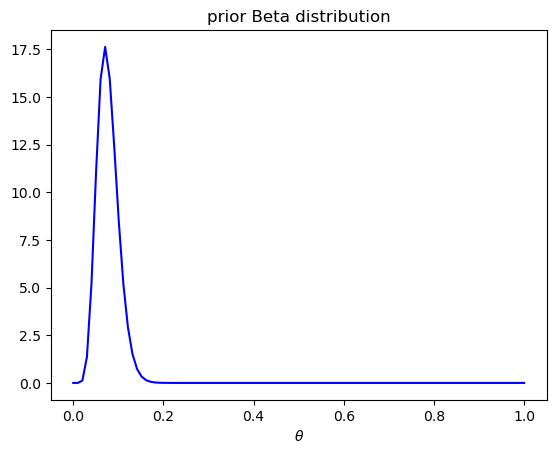

In [2]:
# set the parameters (a0>0, b0>0)
a0, b0 = 10, 120

# plot probability distribution
x = np.linspace(0,1,100)

plt.plot(x, beta.pdf(x, a0,b0), 'b-')
plt.xlabel(r'$\theta$')
plt.title('prior Beta distribution')

plt.show()

<div class="alert alert-info">
<h4>Task 1</h4>

Let's vary the parameters and see how the distribution changes. 

1. As an example, suppose that $\theta$ is the probability of observing head in flipping a coin. We are strongly convinced that the coin is fair. Change the parameters `a0, b0` until you get a distribution that best describes our prior belief. 

2. As an another example, suppose that $\theta$ is the probability a person clicking on an ad. Our prior knowledge about this probability is poor because this is the first time we are running this campaign. So, any probability between 0 and 1 is equally likely. Change the parameters `a0, b0` until you get a distribution that best describes our prior belief. 

3. Following the previous example, suppose that by experience we know that the probability of clicking on an ad is between 0.1 and 0.2. Change the parameters `a0, b0` until you get a distribution that best describes our prior belief.

4. Based on your observations in the previous questions, argue whether these priors were informative or not.
<br>
</div>

**Answer**

1. with a0 = 1000, b0 = 1000 the mass of the distribution is concentrated around 0.5, which is the probability of observing head in flipping a fair coin. 

2. with a0 = 1, b0 = 1 the distribution is uniform between 0 and 1, which means that any probability between 0 and 1 is equally likely.

3. with a0 = 10, b0 = 120 the distribution is concentrated around 0.1 and 0.2.

4. in the first case with a0 = 1000, b0 = 1000 the prior is very strong and informative because it is clearly pointing to 0.5, which is the probability of observing head in flipping a fair coin. Other possibilities are very unlikely. In the second case with a0 = 1, b0 = 1 the prior is poor and not really informative because it is uniform between 0 and 1, which means that any probability between 0 and 1 is equally likely. So the prior is not helping us to make a decision. In the third case with a0 = 20, b0 = 120 the prior is relatively informative because it is concentrated around 0.1 and 0.2, which is the probability of clicking on an ad.

<div class="alert alert-success">
<h5>Likelihood based on a Bernoulli distribution</h5>

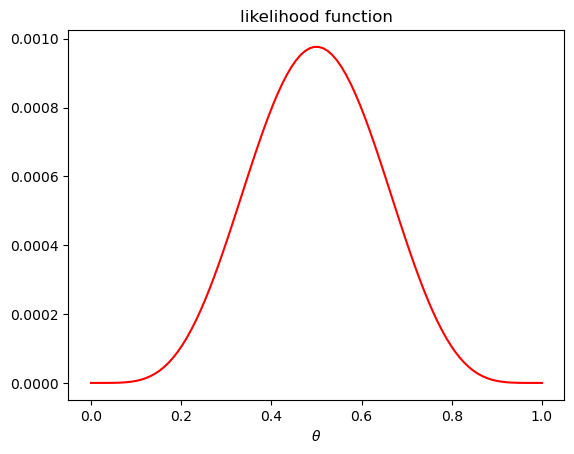

In [3]:
# set the parameters: N is the number of trials, and n_success is the number of successes
N, n_success = 10, 5
plt.plot(x, x**n_success * (1-x)**(N-n_success), 'r')

plt.xlabel(r'$\theta$')
plt.title('likelihood function')
plt.show()

<div class="alert alert-info">
<h4>Task 2</h4>

Let's vary the parameters and see how the distribution changes. 

1. Consider again the example of flipping a coin where $\theta$ is the probability of head. Using `N=10` trials, what should the value for `n_success` be in order to consider the coin as a fair one? Is the shape of the likelihood in line with your expectation?

<br>
</div>

**Answer**

1. with N=10 trials, n_success should be 5 to consider the coin a fair one. The shape of the likelihood is in line with my expectation because it is concentrated around 0.5, which is the probability of observing head in flipping a fair coin. However, the likelihood is not as sharp and narrow as I expected. This is because the number of trials is relatively small. So, other possibilities such as observing 4 or 6 heads are not completely ruled out.

<div class="alert alert-success">
<h5>Posterior distribution as a Beta distribution</h5>

15 125


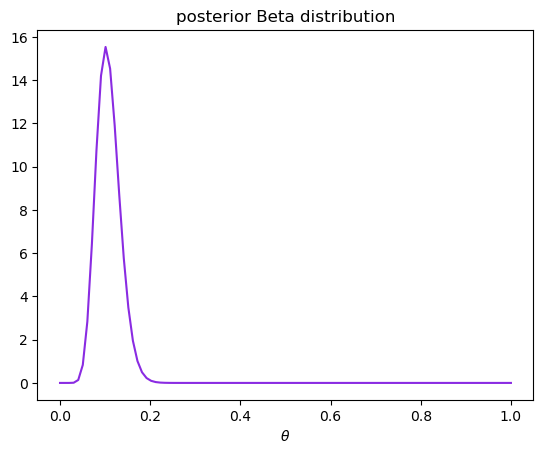

In [4]:
# no need to set the parameters because they are already derived based on the prior and the likelihood
a, b = a0 + n_success, N - n_success + b0
print(a,b)

plt.plot(x, beta.pdf(x, a, b), 'blueviolet')
plt.title('posterior Beta distribution')
plt.xlabel(r'$\theta$')
plt.show()

Let's put all the three plots together in a single figure.

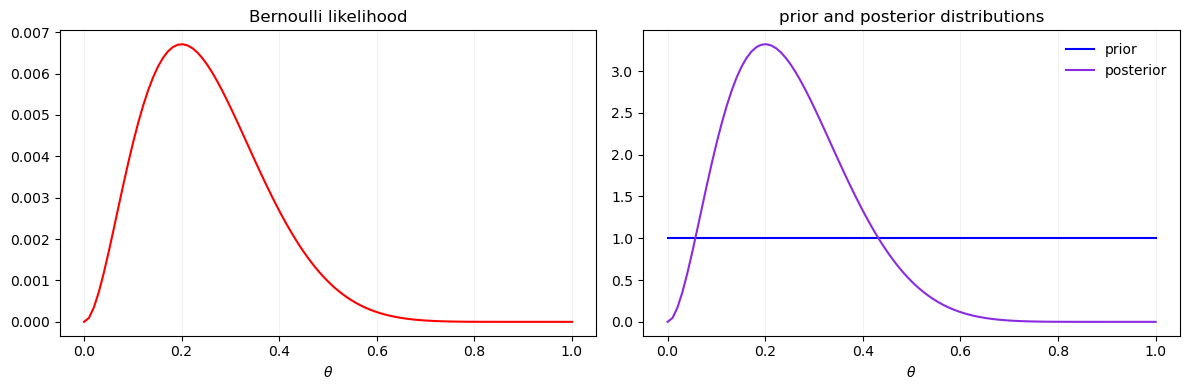

In [5]:
# create all plots in a row
fig, axes = plt.subplots(1, 2, figsize=(12,4))

# set the parameters (a>0, b>0, N>=n_success>0)
a, b = 1, 1
N = 10
n_success = 2

# create a grid of theta values
theta = np.linspace(0,1,100)

# plot Bernoulli likelihood
axes[0].plot(theta, theta**n_success * (1-theta)**(N-n_success), 'r')
axes[0].set_xlabel(r'$\theta$')
axes[0].set_title('Bernoulli likelihood')
axes[0].grid(axis='x', color='0.95')

# plot probability distribution
axes[1].plot(theta, beta.pdf(theta, a,b), 'b-', label='prior')
axes[1].plot(theta, beta.pdf(theta, a+n_success, b+N-n_success), 'blueviolet', label='posterior')

axes[1].set_xlabel(r'$\theta$')
axes[1].set_title('prior and posterior distributions')
axes[1].legend(loc='best', frameon=False)
axes[1].grid(axis='x', color='0.95')

plt.tight_layout()
plt.show()

<div class="alert alert-info">
<h4>Task 3</h4>

Observe how the posterior distribution changes with the prior and likelihood. 

1. Fix `a = 1000, b = 1000` so that you get a strong prior. According to this prior you strongy believe that the coin is fair, i.e. about half of the times you should get a head. Now, you flip the coin 10 times and observe only 2 heads. What is your posterior belief about the fairness of the coin?

2. In the previous case, the sample size of 10 probably didn't change your prior belief. Now, increase the sample size to 1000 while keeping the same success rate. What is your posterior belief about the fairness of the coin?

3. Suppose that you have sent a robot on a newly discovered planet to collect soil samples. You have no prior knowledge about the soil composition of the planet and whether they are rich in iron or not. The robot collects 10 samples and finds that 2 of them are rich in iron. Setup the prior and likelihood parameters based on this information, run the code and discuss the outcome. What is your posterior belief about the soil composition of the planet? In particular, was the 10 samples enough to change your prior belief?

4. Based on your findings in the questions above, discuss the effect of the sample size on the posterior distribution.


<br>
</div>

**Answer**

1. with a = 1000, b = 1000, N=10 trials and n_success=2 the posterior distribution is concentrated around 0.5. In fact, the posterior distribution is in line with our prior belief that the coin is fair. This is because the sample size is too small to change our prior belief. In sum, our prior remains as strong as it was before observing the data.

2. with a = 1000, b = 1000, N=1000 trials and n_success=200 the posterior distribution is concentrated around 0.4. In sum, our belief about fairness of the coin is now weaker than it was before observing the data. This is because the sample size is large enough to change our prior belief.

3. with a = b = 1 and N=10 and n_success=2 the posterior distribution is the same as the likelihood. In fact, the prior is not informative at all as we don't have background knowledge about the new planet. So, the posterior distribution is completely determined by the likelihood. In sum, our prior belief is completely changed by the data.

4. with a small sample size our prior belief usually remains as before. The only case were small sample size changes our prior belief is when the prior is not informative at all. 

<div class="alert alert-info">
<h2>Bonus Exercise</h2>

<h3>Case of Gamma Prior and Exponential Likelihood</h3>

Similar to the Beta distribution which is conjugate to the Bernoulli distribution, the Gamma distribution is conjugate to the Exponential distribution. This means that if we have a Gamma prior distribution and we observe data from a Exponential distribution, then the posterior distribution is also a Gamma distribution. This is a very useful property, because it means that we can update our beliefs about the parameters of a Gamma distribution in a closed-form way. 

Suppose that a number of visitors have visited an exhibition and made donations. Let's assume that the donation amount is exponentially distributed with rate $\lambda$. If we assume that the prior distribution of $\lambda$ is a `Gamma`, then luckily the posterior distribution of $\lambda$ is also `Gamma`.

Start by importing the `gamma` function from the `scipy.stats` module.

In [6]:
from scipy.stats import gamma

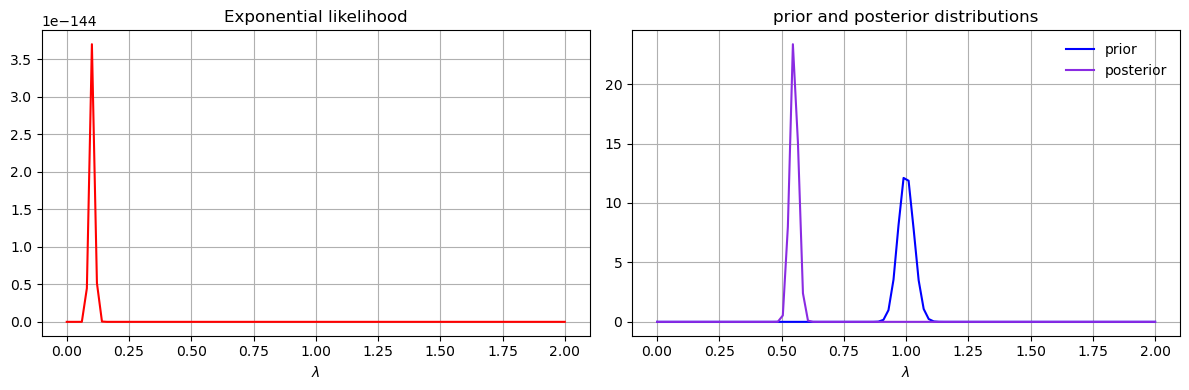

In [7]:
# create the prior, likelihood and posterior Gamma distributions in one row of plots
fig, axes = plt.subplots(1, 2, figsize=(12,4))

# set the parameters of the prior (a>0, b>0)
a, b = 1000, 1000

# set the parameters of the likelihood 
# number of payers and total pay
n_payers, total_pay = 100, 100*10

# create a grid of lambda values
lamda = np.linspace(0, 2, 100)

# plot exponential likelihood
axes[0].plot(lamda, (lamda**n_payers) * np.exp(-lamda*total_pay) , 'r',)

axes[0].set_xlabel(r'$\lambda$')
axes[0].set_title('Exponential likelihood')
axes[0].grid()

# plot probability distribution
axes[1].plot(lamda, gamma.pdf(lamda, a=a, scale=1/b), 'b', label='prior')
axes[1].plot(lamda, gamma.pdf(lamda, a=a+n_payers, scale=1/(b+total_pay)), 'blueviolet', label='posterior')

axes[1].set_xlabel(r'$\lambda$')
axes[1].set_title('prior and posterior distributions')
axes[1].legend(loc='best', frameon=False)
axes[1].grid()

plt.tight_layout()
plt.show()


<div class="alert alert-info">
<h4>Task 4</h4>

Observe how the posterior distribution changes with the prior and likelihood. 

1. From previous exhibitions you know that on average each visitor donates 1 dollar. So, let's fix `a = 1000, b = 1000` to get a strong prior. Just recently, you got 10 new visitors and recieved a sum of 100 dollars. So on average each visitor donated 10 dollars. This is on average 10 times more than what you have recieved from previous exhibitions. What is your posterior belief about the average donation amount? did the 10 new visitors change your prior belief?

2. In the previous case, the sample size of 10 probably didn't change your prior belief much. Now, increase the sample size to 100 while keeping the same average donation per person. What is your posterior belief about the average donation amount?

3. Based on your findings in the questions above, discuss the effect of the sample size on the posterior distribution.


<br>
</div>

**Answer**

1. with a = 1000, b = 1000, n_payers = 10 and total_pay = 100 we get a strong prior. At the same time, the likelihood is also strong because the average donation amount is 10 times more than what we have recieved from previous exhibitions (10 vs 1 dollars). The plot of the posterior shows that the rate $\lambda$ is now less than one, meaning that the average donation amount is larger than 1 dollar. In sum, the 10 new visitors slightly changed our prior belief.

2. with n_payers = 100 and total_pay = 1000, our posterior belief is now completely changed. In fact, the average donation amount is close to 2 dollars.

3. we learned that when data reveals something drastically different from our prior belief, then even a small sample size can change our prior belief, but only slightly. Secondly, similar to the Beta and Bernoulli case, large sample size usually changes our prior belief. 